In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingRegressor,RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.pipeline import make_pipeline
import plotly.express as px
import plotly.graph_objects as go

sns.set()

In [2]:
df = pd.read_csv('../data/shot-data-all.csv')
df_top = pd.read_csv('../data/top-def.csv')
df_mid = pd.read_csv('../data/mid-def.csv')
df_bot = pd.read_csv('../data/bot-def.csv')

In [3]:
#creating dummy variable
number = LabelEncoder()
df['vs_int'] = number.fit_transform(df['vs'])


In [4]:
X = df[['game_time','shot_made','quarter','home','vs_int','shot_distance']]
y = df['cum_shot_made']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.1)

### Linear Regression

In [5]:
reg = LinearRegression()
reg.fit(X_train,y_train)
score = reg.score(X_valid,y_valid)
print(score)

0.5601870727165522


### Voting Classifier

In [6]:
#VOTING CLASS
model = VotingClassifier([
       
       ('tree1', DecisionTreeClassifier(max_depth=4)),
       ('tree2', DecisionTreeClassifier(min_samples_leaf=10)),
    ])
model.fit(X_train,y_train)
score = model.score(X_valid,y_valid)
print(score)

0.24874191229331416


### Gradient Boost

In [7]:
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train,y_train)
score = model.score(X_valid,y_valid)
print(score)

0.5807891917465058


# All team Test

In [8]:
X = df[['game_time','shot_made','quarter','home','shot_distance','shot_value', 'vs_int']]
y = df['cum_shot_made']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)
model = make_pipeline(
    PCA(7), 
    GradientBoostingRegressor()
)
for i in range(0,5):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)

    model.fit(X_train,y_train)
    score = model.score(X_valid,y_valid)
    print(score)


0.5662596171613398
0.5596279867311165
0.5460909911410156
0.5559225081076667
0.563734029601632


# Random Forest Model

In [9]:
Houston = df[df['vs'] == 'HOU']
X = Houston[['game_time','shot_made','quarter','home','shot_distance','shot_value']]
y = Houston['cum_shot_made']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)


model = RandomForestRegressor()
model.fit(X_train,y_train)
score = model.score(X_valid,y_valid)
print(score)

0.5033564812162188


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### PCA

In [10]:
Houston = df[df['vs'] == 'HOU']
X = Houston[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
y = Houston['cum_shot_made']

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(X)


model = make_pipeline(
    StandardScaler(),
    PCA(2), 
    GradientBoostingRegressor()
)
#for i in range(0,10):
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)

model.fit(X_train,y_train)
print(model.score(X_valid,y_valid))
print(model.score(X_train,y_train))


0.7901926079891369
0.8478860812972329


In [11]:
Knicks = df[df['vs'] == 'NYK']
X = Knicks[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
y = Knicks['cum_shot_made']

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(X)


model = make_pipeline(
    StandardScaler(),
    PCA(), 
    GradientBoostingRegressor()
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)

model.fit(X_train,y_train)
print(model.score(X_valid,y_valid))
print(model.score(X_train,y_train))


0.9424885681891065
0.9969763603601364


In [12]:
X = df[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
y = df['cum_shot_made']

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(X)


model = make_pipeline(
    StandardScaler(), 
    PCA(), 
    GradientBoostingRegressor()
)
#for i in range(0,10):
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)

model.fit(X_train,y_train)
print(model.score(X_valid,y_valid))
print(model.score(X_train,y_train))

0.9775074370363817
0.9823029123854673


In [13]:
model.predict(X_valid)

array([-0.12927693,  3.85170975,  1.05164731, ...,  2.90557238,
        4.52064124,  7.08644646])

In [14]:
y_predicted = model.predict(X_valid)
y_predicted


array([-0.12927693,  3.85170975,  1.05164731, ...,  2.90557238,
        4.52064124,  7.08644646])

In [15]:
r2_score(y_valid, y_predicted)

0.9775074370363818

In [16]:
warriors_palette = ['#006BB6', '#FDB927', '#26282A']
sns.set_palette(sns.color_palette(warriors_palette))

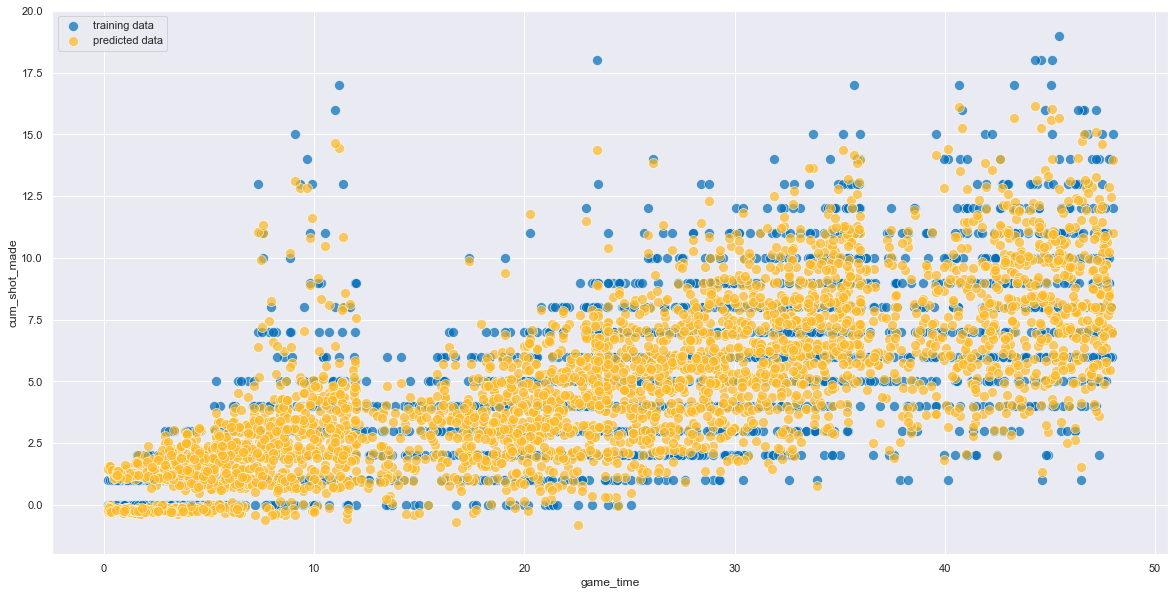

In [17]:
plt.subplots(figsize=(20,10))
sns.scatterplot(X_valid['game_time'],y_valid, alpha=0.7, s=100, label = 'training data')
sns.scatterplot(X_valid['game_time'],y_predicted, alpha=0.7, s=100, label = 'predicted data')
plt.legend()

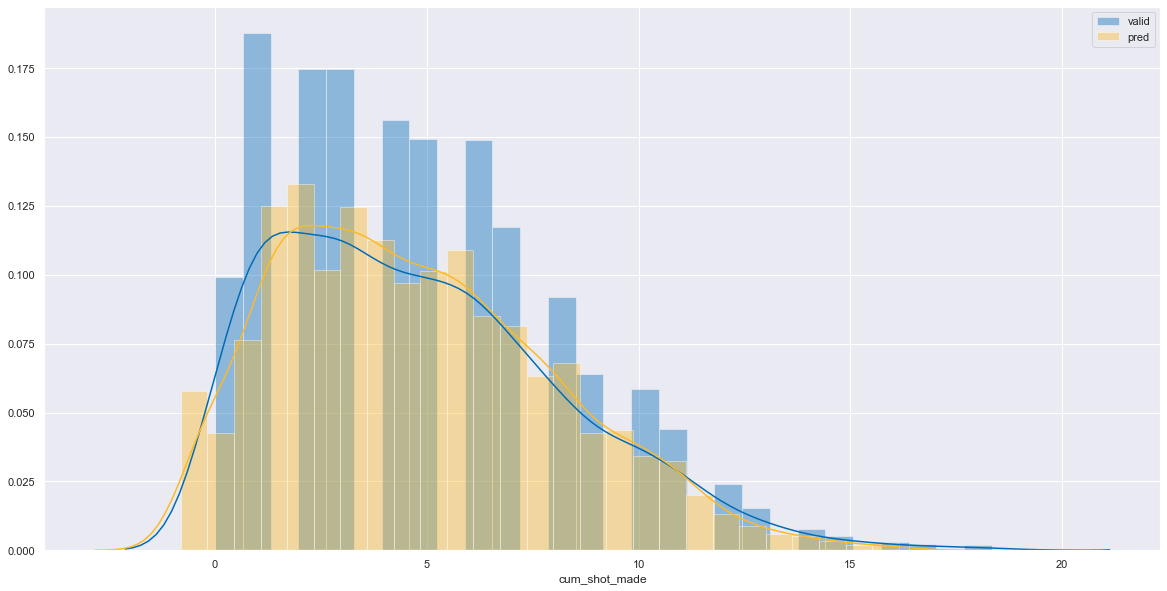

In [18]:
plt.subplots(figsize=(20,10))
sns.distplot(y_valid, label='valid')
sns.distplot(y_predicted, label='pred')
plt.legend()
plt.show()

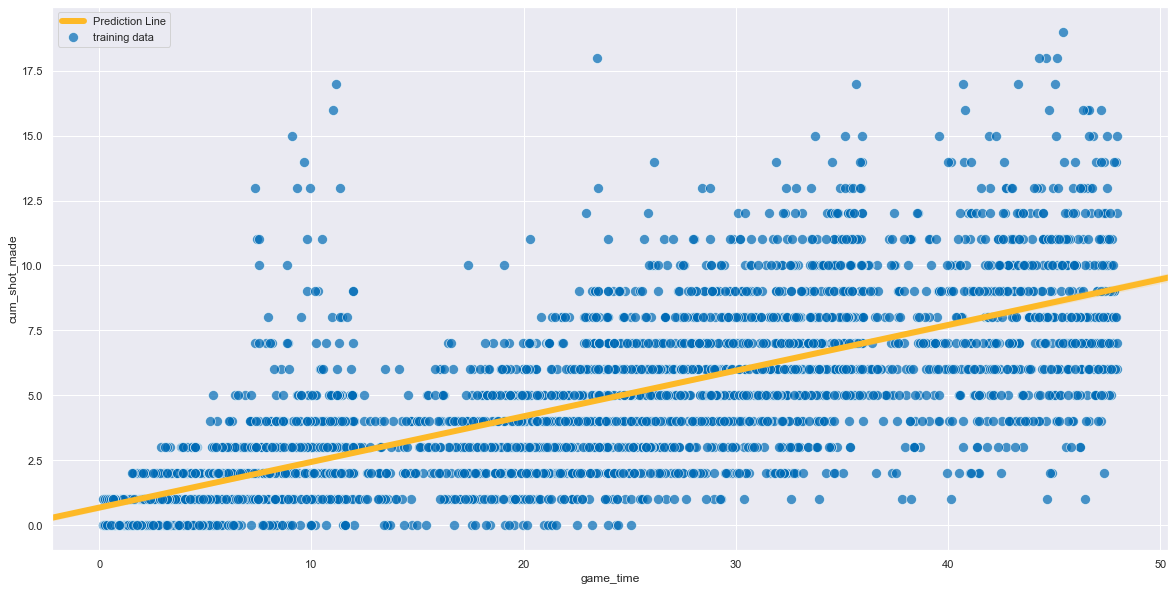

In [19]:
plt.subplots(figsize=(20,10))
sns.scatterplot(X_valid['game_time'],y_valid, alpha=0.7, s=100, label = 'training data')
sns.regplot(X_valid['game_time'],y_predicted,scatter=False, label = 'Prediction Line',line_kws={'lw':6, 'color':'#FDB927'})
plt.legend()

In [20]:
X = df_top[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
y = df_top['cum_shot_made']
model = make_pipeline(
    StandardScaler(), 
    PCA(), 
    GradientBoostingRegressor()
)
#for i in range(0,10):
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.25)
model.fit(X_train,y_train)
print(model.score(X_valid,y_valid))
print(model.score(X_train,y_train))

0.9697273826328839
0.9820992861445902


In [21]:
def return_model():
    return make_pipeline(
    StandardScaler(), 
    PCA(8), 
    GradientBoostingRegressor()
    )
def train_test(df,test_size):
    X = df[['game_time','shot_made','quarter','home','shot_distance','shot_value','cum_attempts','cum_fg_percent']]
    y = df['cum_shot_made']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    return X_train, X_valid, y_train, y_valid


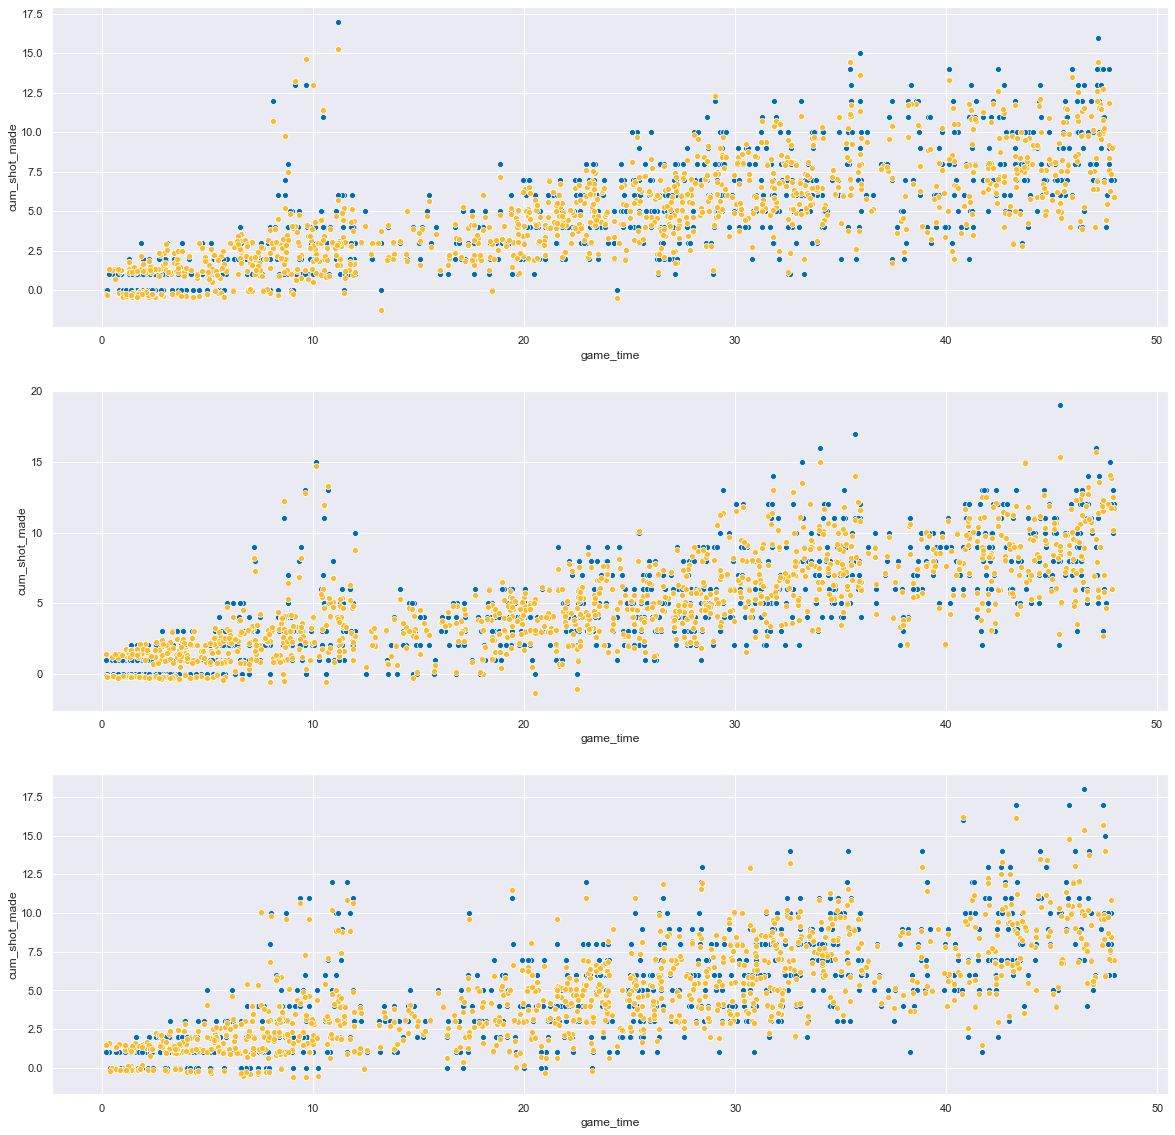

In [32]:
top_def_model = return_model()
mid_def_model = return_model()
bot_def_model = return_model()

#TOP DEFENSE
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
X_train, X_valid, y_train, y_valid = train_test(df_top, 0.25)
top_def_model.fit(X_train,y_train)
y_predict = top_def_model.predict(X_valid)
sns.scatterplot(X_valid['game_time'],y_valid)
sns.scatterplot(X_valid['game_time'],y_predict)

#MID DEFENSE
plt.subplot(3,1,2)
X_train, X_valid, y_train, y_valid = train_test(df_mid, 0.25)
mid_def_model.fit(X_train,y_train) 
y_predict = mid_def_model.predict(X_valid)
sns.scatterplot(X_valid['game_time'],y_valid)
sns.scatterplot(X_valid['game_time'],y_predict)

#BOT DEFENSE
plt.subplot(3,1,3)
X_train, X_valid, y_train, y_valid = train_test(df_bot, 0.25)
bot_def_model.fit(X_train,y_train)
y_predict = bot_def_model.predict(X_valid)
sns.scatterplot(X_valid['game_time'],y_valid)
sns.scatterplot(X_valid['game_time'],y_predict)



In [37]:
fig = px.scatter(x=X_valid['game_time'], y=y_valid)
fig = px.scatter(x=X_valid['game_time'], y=y_predict)
fig.show()




In [44]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_valid['game_time'], y=y_valid,mode='markers'))
fig.add_trace(go.Scatter(x=X_valid['game_time'], y=y_predicted,mode='markers'))

fig.show()